## Week 6: Assignment

## K-means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%load_ext nb_black

<IPython.core.display.Javascript object>

**(1a) Load the data file 'kmc-data1.csv' and visualize the data.**

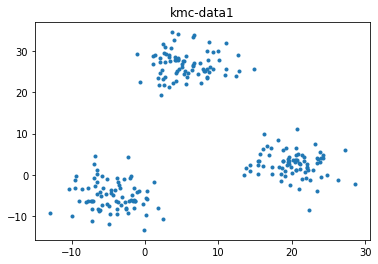

<IPython.core.display.Javascript object>

In [2]:
data = pd.read_csv("kmc-data1.csv", header=None).values
plt.title("kmc-data1")
plt.scatter(data[:, 0], data[:, 1], marker=".")
plt.show()

**(1b) Consider the case where K=1. Take centre as $[6.67,8.33]$ and calculate Within Cluster Sum of Squares (WCSS)**

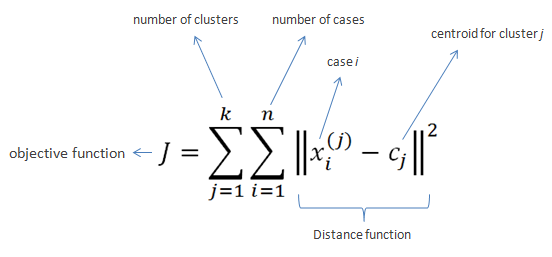

In [3]:
c = np.array([6.67, 8.33])

J = np.sum((data - c) ** 2)

print("WCSS =", J)

WCSS = 73409.43272669788


<IPython.core.display.Javascript object>

**(1c) Write a function to find which class each point belongs to given the centroids and value of K**

Hint: data has dimensions (m x n), centroids has dimensions (K x n)

In [4]:
def get_class(data, centroids, K):
    size = data.shape[0]
    data_class = []  # Create an array to store classes of each data
    for i in data:
        data_class.append(np.argmin(np.sum((centroids - i) ** 2, axis=1)))
    return np.array(data_class)

<IPython.core.display.Javascript object>

**(1d) Write a function to find the centroids given the data points and the corresponding class**

In [5]:
def get_centroids(data, data_class, K):
    centroids = []
    for i in range(K):
        centroids.append(np.mean(data[data_class == i], axis=0))
    return np.array(centroids)

<IPython.core.display.Javascript object>

**(1e) Write a function to calculate WCSS given the data points, the centroids and K** 

In [6]:
def wcss(data, centroids, K):
    wcss_clusterwise = []  # Array to store WCSS of individual clusters
    data_class = get_class(data, centroids, K)
    for i in range(K):
        data_i = data[data_class == i]
        wcss_clusterwise.append(np.sum((data_i - centroids[i]) ** 2))
    wcss_clusterwise = np.array(wcss_clusterwise)
    wcss = np.sum(wcss_clusterwise)
    return wcss

<IPython.core.display.Javascript object>

**K Means Algorithm:<br>**
    1) Allocate a class to each data point given the initial centroids<br>
    2) Calculate the new centroids,i.e, the mean of the data points in each class<br>
    3) Iterate till the stopping criteria. In our case the algorithm stops when the shift in each centroid is less than tolerance<br>
    

**(1f) Let $K = 3$ and the initial cluster centroids be $[10,30], [25,-5]$ and $[-5,10]$ and write a function to implement K-means clustering using functions defined above. Plot the final clusters with K-means clustering.<br> Take tolerance as $0.001$**

In [7]:
def kmeans(data, K, centroids):
    tolerance = 0.001
    wcss_val = wcss(data, centroids, K)
    old_wcss_val = wcss_val + 1
    data_class = []
    old_centroids = centroids
    while True:
        data_class = get_class(data, centroids, K)
        old_centroids = centroids
        centroids = get_centroids(data, data_class, K)
        old_wcss_val = wcss_val
        wcss_val = wcss(data, centroids, K)
        if np.all((centroids - old_centroids) < 0.01):
            break
    plt.title("K-Means Clustering, K=" + str(K))
    plt.scatter(data[:, 0], data[:, 1], c=data_class, marker=".")
    plt.scatter(
        centroids[:, 0], centroids[:, 1], c=["b"] * K, marker="X", label="Centroids",
    )
    plt.legend()
    plt.show()
    return data_class, centroids

<IPython.core.display.Javascript object>

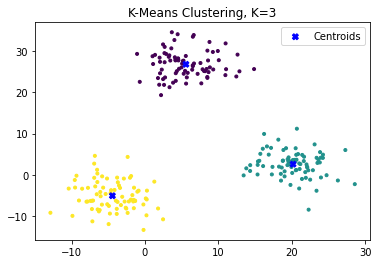

<IPython.core.display.Javascript object>

In [8]:
data_class, centroids = kmeans(data, 3, np.array([[10, 30], [25, -5], [-5, 10]]))

**(1g) Compute the sum of square distance of each point from the cluster centroid.**

In [9]:
for i in range(3):
    print(
        "Centroid :",
        centroids[i],
        ", Distance Sum :",
        np.sum((data[data_class == i] - centroids[i]) ** 2),
    )

Centroid : [ 5.57364328 26.74003828] , Distance Sum : 1658.0965836582106
Centroid : [20.17029606  2.62716538] , Distance Sum : 1504.7218852866977
Centroid : [-4.44269723 -4.99310089] , Distance Sum : 1773.9037615481852


<IPython.core.display.Javascript object>

**(1h) Repeat the above exercise for $K = 1,2,3,4$. You can use appropriate initial centroids based on the visualization**

**Plot the final clusters (for $K = 1,2,3,4$) and report the sum of square distance of each point from the cluster mean. Give your observations.**

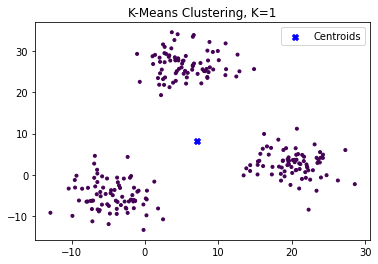

K= 1
Centroid : [7.10041403 8.12470092] , Distance Sum : 73354.85577801635


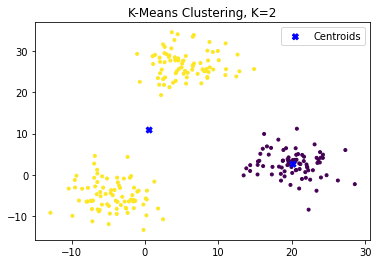

K= 2
Centroid : [20.17029606  2.62716538] , Distance Sum : 1504.7218852866977
Centroid : [ 0.56547302 10.87346869] , Distance Sum : 47724.76831170698


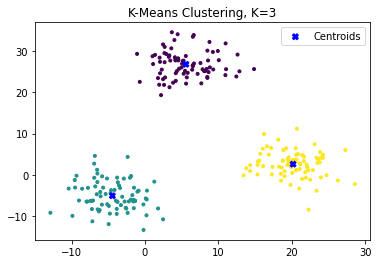

K= 3
Centroid : [ 5.57364328 26.74003828] , Distance Sum : 1658.0965836582106
Centroid : [-4.44269723 -4.99310089] , Distance Sum : 1773.9037615481852
Centroid : [20.17029606  2.62716538] , Distance Sum : 1504.7218852866977


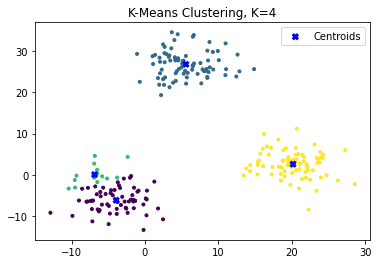

K= 4
Centroid : [-3.92804828 -6.0775107 ] , Distance Sum : 1088.025299668832
Centroid : [ 5.57364328 26.74003828] , Distance Sum : 1658.0965836582106
Centroid : [-6.86889946  0.11911674] , Distance Sum : 142.48795418794236
Centroid : [20.17029606  2.62716538] , Distance Sum : 1504.7218852866977


<IPython.core.display.Javascript object>

In [10]:
Ks = [1, 2, 3, 4]
centroids_list = [
    np.array([[5, 10]]),
    np.array([[15, 10], [0, 10]]),
    np.array([[5, 20], [0, 5], [15, 10]]),
    np.array([[5, 0], [5, 20], [0, 10], [20, 10]]),
]

for i in range(4):
    K = Ks[i]
    centroids = centroids_list[i]

    data_class, centroids = kmeans(data, K, centroids)

    print("K=", K)
    for i in range(K):
        print(
            "Centroid :",
            centroids[i],
            ", Distance Sum :",
            np.sum((data[data_class == i] - centroids[i]) ** 2),
        )

**(2a) Load the data from the file 'kmc-data2.csv' and visualize the data on a scatter plot.**

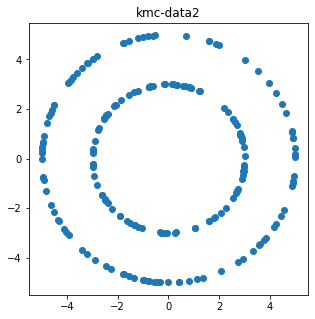

<IPython.core.display.Javascript object>

In [11]:
data_2 = pd.read_csv("kmc-data2.csv", header=None).values
plt.figure(figsize=(5, 5))
plt.title("kmc-data2")
plt.scatter(data_2[:, 0], data_2[:, 1])
plt.show()

**(2b) Cluster the data with K-means clustering. Consider $K = 2$. (You can use scikit-learn library for to perform clustering)**

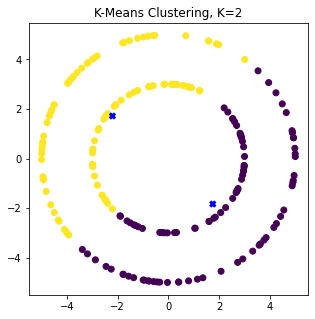

<IPython.core.display.Javascript object>

In [12]:
model = KMeans(n_clusters=2)
data_2_class = model.fit_predict(data_2)

plt.figure(figsize=(5, 5))
plt.title("K-Means Clustering, K=2")
plt.scatter(data_2[:, 0], data_2[:, 1], c=data_2_class)
plt.scatter(
    model.cluster_centers_[:, 0],
    model.cluster_centers_[:, 1],
    c=["b"] * 2,
    marker="X",
    label="Centroids",
)
plt.show()

**(2c) Suppose you want to identify two ring clusters as visualised in the scatter plot. Now, transform the data such that K-means clustering identifies the two ring clusters.**

Hint: The points in the inner circle have the same radius and so do the points on the outer circle. This can be an effective way to cluster those points. Now think of transforming the 2D data to 1D data and then cluster.

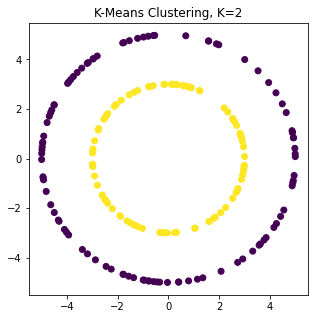

<IPython.core.display.Javascript object>

In [13]:
r_data = np.sum((data_2 - np.array([0, 0])) ** 2, axis=1)

model = KMeans(n_clusters=2)
data_2_class = model.fit_predict(r_data.reshape(-1, 1))

plt.figure(figsize=(5, 5))
plt.title("K-Means Clustering, K=2")
plt.scatter(data_2[:, 0], data_2[:, 1], c=data_2_class)
plt.show()

**(3) Perform K-means clustering on Bank note dataset (attached) which is a classification dataset. Split the data into test and train (80:20 ratio with random seed=0). Perform clustering on the training data and predict labels for test data based on the clusters obtained. Compare the predictions with actual labels and report accuracy. (You can use scikit-learn library for K-means and train-test split and accuracy)**

In [14]:
bank_data = pd.read_csv("data_banknote_authentication.csv", header=None)
X_train, X_test, y_train, y_test = train_test_split(
    bank_data[[1, 2, 3]], bank_data[[4]], test_size=0.2, random_state=0
)

<IPython.core.display.Javascript object>

In [15]:
model = KMeans(n_clusters=len(np.unique(y_train)))
model.fit(X_train)

KMeans(n_clusters=2)

<IPython.core.display.Javascript object>

In [16]:
centroids = model.cluster_centers_
test_classes = get_class(centroids=centroids, K=2, data=X_test.values)
print(
    "Accuracy = {0:.3f}".format(
        max(
            np.sum(test_classes.reshape(-1, 1) == y_test.values) / len(y_test),
            np.sum(test_classes.reshape(-1, 1) == 1 - y_test.values) / len(y_test),
        )
    )
)

Accuracy = 0.658


<IPython.core.display.Javascript object>

## Logistic Regression

Logistic Regression uses the sigmoid function for binary classification. 

**(4a) Plot the sigmoid function $\frac{1}{1+e^{-x}}$ for x in the range [-20,20] at 100 equally spaced values. This exercise will help you understand the shape of the sigmoid function and show its relevance in binary classification problems**

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

<IPython.core.display.Javascript object>

In [18]:
x = np.linspace(-20, 20, 100)

<IPython.core.display.Javascript object>

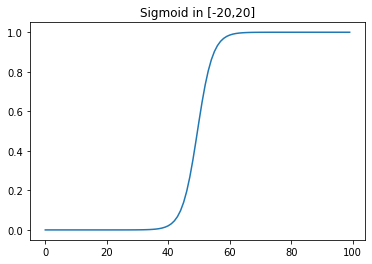

<IPython.core.display.Javascript object>

In [19]:
plt.title("Sigmoid in [-20,20]")
plt.plot(sigmoid(x))
plt.show()

**(4b) Comment on the nature of the sigmoid function graph (specifically : domain,range,behaviour in extreme inputs).**

Domain - $(-\infty,\infty)$

Range - $(0,1)$

Behaviour in Extreme Inputs - Negative Extreme $\implies$ returns $0$ ; Positive Extreme $\implies$ returns $1$

**(4c) Using the derivative formula of sigmoid function, plot the gradients of the sigmoid function for the 100 values in the range [-20,20].**

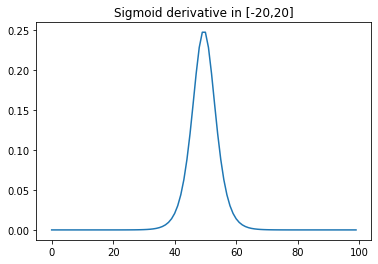

<IPython.core.display.Javascript object>

In [20]:
plt.title("Sigmoid derivative in [-20,20]")
plt.plot(sigmoid(x) * (1 - sigmoid(x)))
plt.show()

**Consider the given data X_logistic.txt and y_logistic.txt. Perform random shuffle and then split the data as train-validation-test sets in the ratio of 80:10:10. Note that the y value gives the class label (0 or 1).** 

**(5a) Implement logistic regression (using only numpy) to predict whether the test datapoints belong to class 0 or 1. Gradient descent also has to be implemented using numpy. Choose the best learning rate parameter between 0.001, 0.01, 0.1 and the number of iterations between 50, 100 and 1000 by using validation dataset. Using the chosen model (best learning rate and number of iterations), report the prediction accuracy on test data. Use a random initialization of weights.**



In [21]:
X = np.loadtxt("X_logistic.txt")
y = np.loadtxt("y_logistic.txt").reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, random_state=0, test_size=0.5
)

<IPython.core.display.Javascript object>

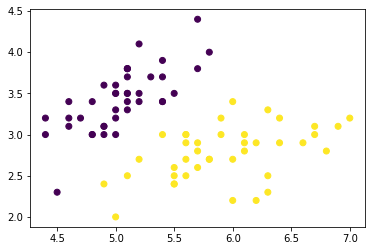

<IPython.core.display.Javascript object>

In [22]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

In [23]:
# Class for running logistic regression

class Logistic_Regression:  
    
    # Initializing params
    
    def __init__(self, lr=0.01, num_iter=5000000, add_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.add_intercept = add_intercept
        self.verbose = verbose
    
    # Add intercept to the X
    
    def make_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    # Function to calculate sigmoid
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Function to calculate loss
    
    def loss(self, h, y):
        t = -y * np.log(h) - (1 - y) * np.log(1 - h)
        return np.nanmean(t)
    
    # Function to train the model
    
    def fit(self, X, y):
        if self.add_intercept:
            X = self.make_intercept(X)
        
        # weights initialization
        
        self.W = np.random.random((X.shape[1],y.shape[1]))
        
        # Train loop
        
        for i in range(self.num_iter):
            
            # Calculate gradient
            
            z = np.dot(X, self.W)
            h = self.sigmoid(z)
            k = np.subtract(h,y)
            gradient = np.dot(X.T, k) / len(y)
            self.W = np.subtract(self.W,self.lr * gradient)
            
            # Print loss every 100 train steps
            
            if(self.verbose == True and i%100==0):
                z = np.dot(X, self.W)
                h = self.sigmoid(z)
                print('loss:'+str(self.loss(h, y)))
    
    # Functions to get prediction
    
    def predict_probabaility(self, X):
        if self.add_intercept:
            X = self.make_intercept(X)
    
        return self.sigmoid(np.dot(X, self.W))
    
    def predict(self, X, threshold):
        return np.array([1 if i else 0 for i in self.predict_probabaility(X) >= threshold]).reshape(-1,1)


<IPython.core.display.Javascript object>

In [24]:
best_model = -1
best_acc = -np.inf
for lr in [0.001, 0.01, 0.1]:
    for it in [50, 100, 1000]:
        model = Logistic_Regression(lr=lr, num_iter=it)
        model.fit(X_train, y_train)
        acc = np.sum(model.predict(X_val, threshold=0.5) == y_val) / len(y_val)
        if acc > best_acc:
            best_acc = acc
            best_model = model

<IPython.core.display.Javascript object>

In [25]:
# Report accuracy
print(
    "Test Accuracy =",
    np.sum(best_model.predict(X_test, threshold=0.50) == y_test) / len(y_test),
)

Test Accuracy = 1.0


<IPython.core.display.Javascript object>

**(5b) Plot the logistic regression classifier (decision boundary) on a 2d plot and include the train and test datapoints on the plot in different colours.
(Say dark green for class 0 test datapoints and dark red for class 1 test datapoints. Similarly, light green and light red for train datapoints).**

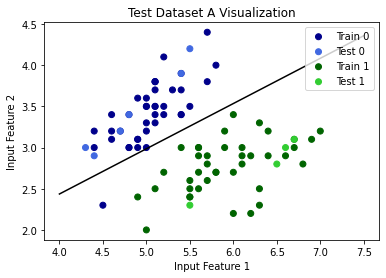

<IPython.core.display.Javascript object>

In [26]:
xx = np.linspace(4, 7.5, 100)
m = -best_model.W[1] / best_model.W[2]
c = -best_model.W[0] / best_model.W[2]
yy = m * xx + c

plt.plot(xx, yy, "black")
# Plotting test data with decision boundary
plt.title("Test Dataset A Visualization")
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
# plt.plot(xx, yy)
for f in [0, 1]:
    plt.scatter(
        X_train[(y_train == f).reshape(len(y_train)), 0],
        X_train[(y_train == f).reshape(len(y_train)), 1],
        c=["darkgreen" if i == 1 else "darkblue" for i in y_train[y_train == f]],
        cmap="jet",
        label="Train " + str(f),
    )
    y_preds = best_model.predict(X_test, threshold=0.5)
    plt.scatter(
        X_test[(y_preds == f).reshape(len(y_preds)), 0],
        X_test[(y_preds == f).reshape(len(y_preds)), 1],
        c=["limegreen" if i == 1 else "royalblue" for i in y_preds[y_preds == f]],
        label="Test " + str(f),
    )
plt.legend(loc=1)
plt.show()

**(6) Consider the bank note dataset provided. Perform random shuffle and train-test split(80:20). Using sklearn, implement logistic regression to predict whether the test datapoints belong to class 0 or 1. Report the prediction accuracy on test data.**

In [27]:
bank_data = pd.read_csv("data_banknote_authentication.csv", header=None)
X = bank_data[[0, 1, 2, 3]]
y = bank_data[4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

<IPython.core.display.Javascript object>

In [28]:
acc = np.sum(y_test == model.predict(X_test)) / len(y_test)

print("Test Accuracy =", acc)

Test Accuracy = 0.9927272727272727


<IPython.core.display.Javascript object>